In [1]:
library(dplyr) #%>%
library(tidyr) #drop_na
library(piecewiseSEM) 
library(nlme)
library(lme4) #glmer
library(diagram) #visual
library(lcsm) #latent change score model
library(patchwork) #to plot trajectories() 
library(lavaan) #lavInspect
library(lavaanPlot)
library(tidySEM) #graph_sem
library(psych) #desscribe df

Warning message:
"le package 'dplyr' a été compilé avec la version R 4.1.2"

Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"le package 'tidyr' a été compilé avec la version R 4.1.2"
Warning message:
"le package 'piecewiseSEM' a été compilé avec la version R 4.1.2"

  This is piecewiseSEM version 2.1.0.


  Questions or bugs can be addressed to <LefcheckJ@si.edu>.

Warning message:
"le package 'nlme' a été compilé avec la version R 4.1.2"

Attachement du package : 'nlme'


L'objet suivant est masqué depuis 'package:dplyr':

    collapse


Warning message:
"le package 'lme4' a été compilé avec la version R 4.1.2"
Le chargement a nécessité le package : Matrix

Warning message:
"le package 'Matrix' a été compilé avec la version R 4.1.2"

Attachement du package : 'Matrix'


Les objets suivants sont masqués depuis

# Download data

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/Camille Montalcini/Origins.GS/DataOutput/TrackingSystem/EXP2_'
path_visual = file.path(path_, 'visual')
dir.create(path_visual)
path_save = file.path(path_, 'LSCMmodels')
dir.create(path_save)
df = read.csv(file.path(path_,'df_lcsm_oneobsperhen3exp.csv'), header = TRUE, sep = ",")
#df = read.csv(file.path(path_,'df_lcsm_oneobsperhen.csv'), header = TRUE, sep = ",")
df$HenID = as.factor(df$HenID)   
print(dim(df))
summary(df)
head(df)
describe(df)

Warning message in dir.create(path_visual):
"'G:\VPHI\Welfare\2- Research Projects\Camille Montalcini\Origins.GS\DataOutput\TrackingSystem\EXP2_\visual' existe déjà"
Warning message in dir.create(path_save):
"'G:\VPHI\Welfare\2- Research Projects\Camille Montalcini\Origins.GS\DataOutput\TrackingSystem\EXP2_\LSCMmodels' existe déjà"


[1] 437  40


          HenID        hybrid           Treatment         ExperimentID      
 EXP1_hen_1  :  1   Length:437         Length:437         Length:437        
 EXP1_hen_10 :  1   Class :character   Class :character   Class :character  
 EXP1_hen_100:  1   Mode  :character   Mode  :character   Mode  :character  
 EXP1_hen_101:  1                                                           
 EXP1_hen_102:  1                                                           
 EXP1_hen_103:  1                                                           
 (Other)     :431                                                           
   severity1        severity2       severity3       severity4     
 Min.   : 0.000   Min.   : 0.00   Min.   : 0.00   Min.   :  0.00  
 1st Qu.: 0.000   1st Qu.: 2.00   1st Qu.:10.00   1st Qu.: 16.00  
 Median : 0.000   Median :12.00   Median :20.00   Median : 28.00  
 Mean   : 5.097   Mean   :17.97   Mean   :25.16   Mean   : 32.35  
 3rd Qu.: 2.000   3rd Qu.:28.00   3rd Qu.:36.00  

,HenID,hybrid,Treatment,ExperimentID,severity1,severity2,severity3,severity4,gap1,gap2,...,time2eventAVG2,time2eventAVG3,time2eventAVG4,PenID1,PenID2,PenID3,PenID4,IsOFH,is_Exp2trackinghybrid,IsRelocated
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,EXP2_hen_1,DW,IsRelocated,Exp2,0,0,1,18,0,0,...,4.0,4,4,pen10,pen11,pen8,pen9,0,0,1
2,EXP2_hen_10,DW,IsRelocated,Exp2,0,0,0,14,0,0,...,5.5,4,4,pen10,pen9,pen3,pen11,0,0,1
3,EXP2_hen_100,DW,IsRelocated,Exp2,0,20,17,20,0,1,...,5.5,4,4,pen4,pen8,pen9,pen12,0,0,1
4,EXP2_hen_101,DW,IsNotRelocated,Exp2,0,6,6,10,0,0,...,4.0,4,4,pen4,pen4,pen4,pen4,0,0,0
5,EXP2_hen_102,DW,IsRelocated,Exp2,0,1,3,8,0,0,...,4.0,4,4,pen4,pen12,pen8,pen10,0,0,1
6,EXP2_hen_103,DW,IsRelocated,Exp2,0,0,0,6,0,0,...,5.5,4,4,pen4,pen8,pen9,pen3,0,0,1


,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HenID*,1,437,219.00000000,126.2952889,219.000000,219.00000000,161.603400,1.00000000,437.00000,436.000000,0.00000000,-1.2082411,6.041522987
hybrid*,2,437,1.13729977,0.3445580,1.000000,1.04843305,0.000000,1.00000000,2.00000,1.000000,2.10048962,2.4176046,0.016482444
Treatment*,3,437,4.20137300,1.4607080,4.000000,4.30769231,1.482600,1.00000000,6.00000,5.000000,-0.41672169,-0.8093999,0.069875139
ExperimentID*,4,437,1.66132723,0.7069063,2.000000,1.57834758,1.482600,1.00000000,3.00000,2.000000,0.58522421,-0.8493273,0.033815916
severity1,5,402,5.09701493,12.0585869,0.000000,1.98757764,0.000000,0.00000000,95.00000,95.000000,3.44835632,15.3904492,0.601427649
severity2,6,397,17.96977330,19.0606182,12.000000,14.92789969,14.826000,0.00000000,98.00000,98.000000,1.44772111,2.0208100,0.956625004
severity3,7,398,25.16331658,21.1709121,20.000000,22.20937500,19.273800,0.00000000,98.00000,98.000000,1.23627070,1.3164119,1.061201932
severity4,8,374,32.35026738,21.8345666,28.000000,29.98333333,19.273800,0.00000000,100.00000,100.000000,0.90447474,0.3314834,1.129038559
gap1,9,402,0.11194030,0.3156859,0.000000,0.01552795,0.000000,0.00000000,1.00000,1.000000,2.45240226,4.0243061,0.015744980


In [3]:
#In case
#https://search.r-project.org/CRAN/refmans/lavaan/html/lavInspect.html
#A square matrix is called positive definite if it is symmetric and all its eigenvalues λ are positive, that is λ > 0.
#lavInspect(bi_lavaan_results, "theta")
#M = lavInspect(bi_lavaan_results, "cov.lv")
#M
#eigen(M)
#det(M)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Warning message:
"Removed 171 row(s) containing missing values (geom_path)."
Warning message:
"Removed 177 rows containing missing values (geom_point)."
Warning message:
"Removed 171 row(s) containing missing values (geom_path)."
Warning message:
"Removed 177 rows containing missing values (geom_point)."
Warning message:
"Removed 171 row(s) containing missing values (geom_path)."
Warning message:
"Removed 177 rows containing missing values (geom_point)."
Warning message:
"Removed 171 row(s) containing missing values (geom_path)."
Warning message:
"Removed 177 rows containing missing values (geom_point)."


png 
  2

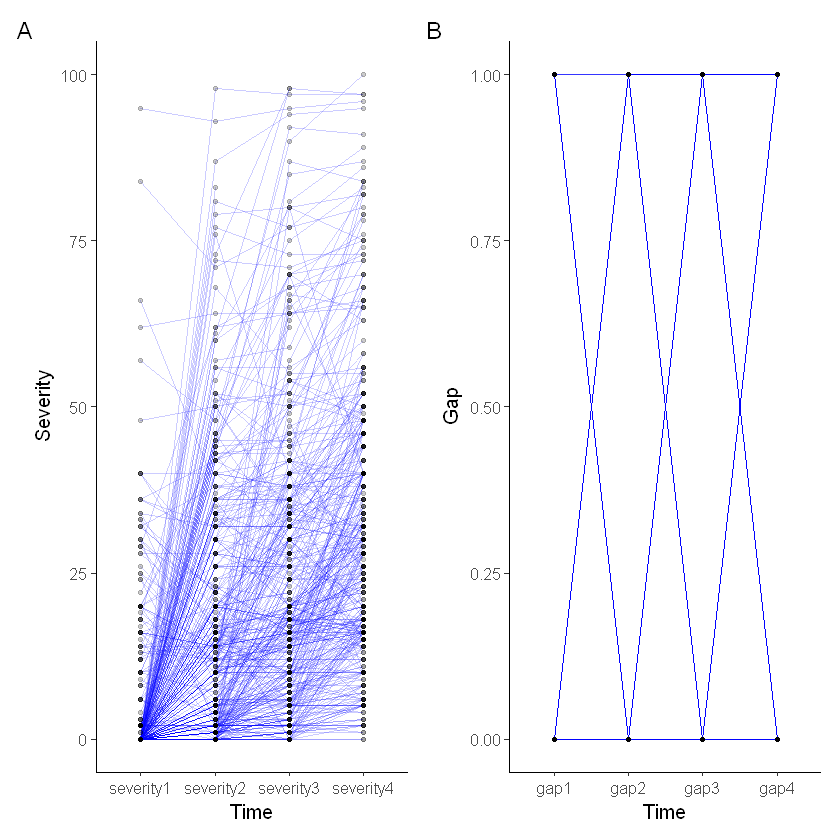

In [4]:
plot_sev <- plot_trajectories(data = df,
                            id_var = "HenID", 
                            var_list = c("severity1", 'severity2',"severity3", "severity4"),
                            xlab = "Time", ylab = "Severity",
                            connect_missing = FALSE, 
                            random_sample_frac = 1)

plot_gap <- plot_trajectories(data = df,
                            id_var = "HenID", 
                            var_list = c("gap1",'gap2', "gap3", "gap4"),
                            xlab = "Time", ylab = "Gap",
                            connect_missing = FALSE, 
                            random_sample_frac = 1)

# Arrange plots next to each other using patchwork
plot_sev+ plot_gap+ plot_annotation(tag_levels = 'A')

tiff(file.path(path_visual, 'Trajectories_HAExp3.tiff'), width=1200, height=400)
plot_sev+ plot_gap+ plot_annotation(tag_levels = 'A')
dev.off()

Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."
Warning message:
"Removed 260 row(s) containing missing values (geom_path)."
Warning message:
"Removed 294 rows containing missing values (geom_point)."


png 
  2

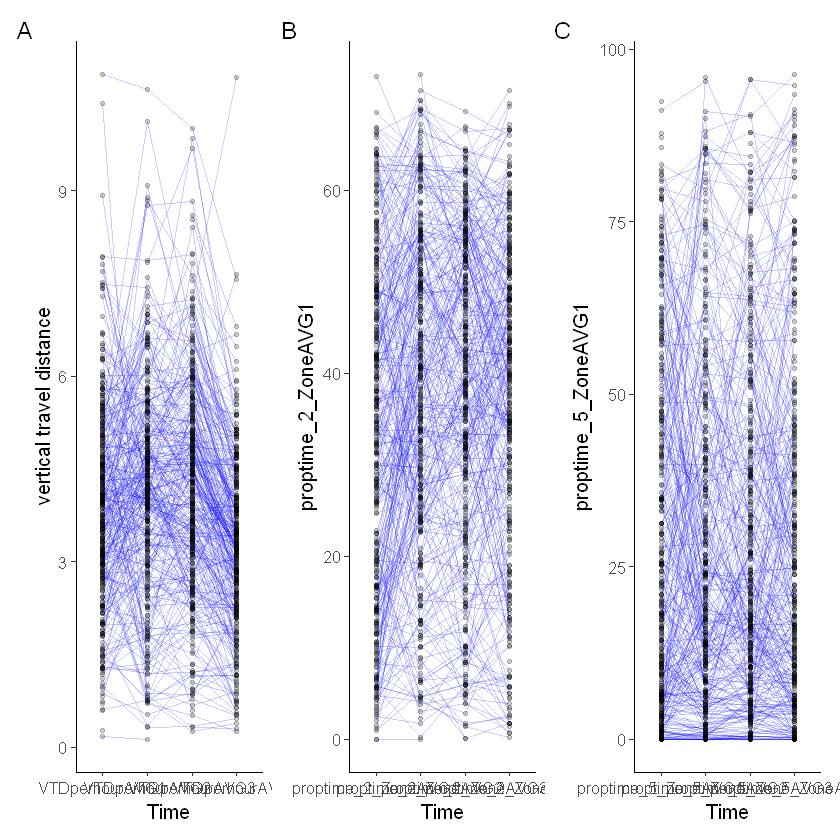

In [5]:
# movement trajectories
plot_VTDperhourAVG <- plot_trajectories(data = df,
                            id_var = "HenID", 
                            var_list = c("VTDperhourAVG1",'VTDperhourAVG2', "VTDperhourAVG3", "VTDperhourAVG4"),
                            xlab = "Time", ylab = "vertical travel distance",
                            connect_missing = FALSE, 
                            random_sample_frac = 1)

plot_z4 <- plot_trajectories(data = df,
                            id_var = "HenID", 
                            var_list = c("proptime_2_ZoneAVG1",'proptime_2_ZoneAVG2', "proptime_2_ZoneAVG3", "proptime_2_ZoneAVG4"),
                            xlab = "Time", ylab = "proptime_2_ZoneAVG1",
                            connect_missing = FALSE, 
                            random_sample_frac = 1)

plot_WG <- plot_trajectories(data = df,
                            id_var = "HenID", 
                            var_list = c("proptime_5_ZoneAVG1",'proptime_5_ZoneAVG2', "proptime_5_ZoneAVG3", "proptime_5_ZoneAVG4"),
                            xlab = "Time", ylab = "proptime_5_ZoneAVG1",
                            connect_missing = FALSE, 
                            random_sample_frac = 1)
# Arrange plots next to each other using patchwork
plot_VTDperhourAVG + plot_z4 + plot_WG +plot_annotation(tag_levels = 'A')

tiff(file.path(path_visual, 'Trajectories_movementsexp3.tiff'), width=1200, height=400)
plot_VTDperhourAVG + plot_z4 + plot_WG +plot_annotation(tag_levels = 'A')
dev.off()

In [6]:
#check correlation
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG1','VTDperhourAVG2', "VTDperhourAVG3", "VTDperhourAVG4")])
dim(df_)
round(cor(df_[,c('VTDperhourAVG1','VTDperhourAVG2', "VTDperhourAVG3", "VTDperhourAVG4")],
         method = c("pearson")), 2)
#method = c("pearson", "kendall", "spearman")

df_ = na.omit(df[,c("proptime_2_ZoneAVG1",'proptime_2_ZoneAVG2', "proptime_2_ZoneAVG3", "proptime_2_ZoneAVG4")])
dim(df_)
round(cor(df_[,c("proptime_2_ZoneAVG1",'proptime_2_ZoneAVG2', "proptime_2_ZoneAVG3", "proptime_2_ZoneAVG4")],
         method = c("pearson")), 2)

df_ = na.omit(df[,c("proptime_5_ZoneAVG1",'proptime_5_ZoneAVG2', "proptime_5_ZoneAVG3", "proptime_5_ZoneAVG4")])
dim(df_)
round(cor(df_[,c("proptime_5_ZoneAVG1",'proptime_5_ZoneAVG2', "proptime_5_ZoneAVG3", "proptime_5_ZoneAVG4")],
         method = c("pearson")), 2)

df_ = na.omit(df[,c("severity1",'severity2', "severity3", "severity4")])
dim(df_)
round(cor(df_[,c("severity1",'severity2', "severity3", "severity4")],
         method = c("pearson")), 2)

[1] 437  40

[1] 273   4

,VTDperhourAVG1,VTDperhourAVG2,VTDperhourAVG3,VTDperhourAVG4
VTDperhourAVG1,1.00,0.5,0.43,0.44
VTDperhourAVG2,0.50,1.0,0.80,0.70
VTDperhourAVG3,0.43,0.8,1.00,0.74
VTDperhourAVG4,0.44,0.7,0.74,1.00


[1] 273   4

,proptime_2_ZoneAVG1,proptime_2_ZoneAVG2,proptime_2_ZoneAVG3,proptime_2_ZoneAVG4
proptime_2_ZoneAVG1,1.00,0.73,0.69,0.62
proptime_2_ZoneAVG2,0.73,1.00,0.88,0.73
proptime_2_ZoneAVG3,0.69,0.88,1.00,0.81
proptime_2_ZoneAVG4,0.62,0.73,0.81,1.00


[1] 273   4

,proptime_5_ZoneAVG1,proptime_5_ZoneAVG2,proptime_5_ZoneAVG3,proptime_5_ZoneAVG4
proptime_5_ZoneAVG1,1.00,0.68,0.58,0.49
proptime_5_ZoneAVG2,0.68,1.00,0.87,0.74
proptime_5_ZoneAVG3,0.58,0.87,1.00,0.84
proptime_5_ZoneAVG4,0.49,0.74,0.84,1.00


[1] 334   4

,severity1,severity2,severity3,severity4
severity1,1.00,0.28,0.25,0.23
severity2,0.28,1.00,0.77,0.75
severity3,0.25,0.77,1.00,0.85
severity4,0.23,0.75,0.85,1.00


In [7]:
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG1','proptime_2_ZoneAVG1', "proptime_5_ZoneAVG1")])
dim(df_)
round(cor(df_[,c('VTDperhourAVG1','proptime_2_ZoneAVG1', "proptime_5_ZoneAVG1")],
         method = c("pearson")), 2)

[1] 437  40

[1] 379   3

,VTDperhourAVG1,proptime_2_ZoneAVG1,proptime_5_ZoneAVG1
VTDperhourAVG1,1.00,0.40,-0.44
proptime_2_ZoneAVG1,0.40,1.00,-0.67
proptime_5_ZoneAVG1,-0.44,-0.67,1.00


In [8]:
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG2','proptime_2_ZoneAVG2', "proptime_5_ZoneAVG2")])
dim(df_)
round(cor(df_[,c('VTDperhourAVG2','proptime_2_ZoneAVG2', "proptime_5_ZoneAVG2")],
         method = c("pearson")), 2)

[1] 437  40

[1] 343   3

,VTDperhourAVG2,proptime_2_ZoneAVG2,proptime_5_ZoneAVG2
VTDperhourAVG2,1.00,0.49,-0.52
proptime_2_ZoneAVG2,0.49,1.00,-0.82
proptime_5_ZoneAVG2,-0.52,-0.82,1.00


In [9]:
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG3','proptime_2_ZoneAVG3', "proptime_5_ZoneAVG3")])
dim(df_)
round(cor(df_[,c('VTDperhourAVG3','proptime_2_ZoneAVG3', "proptime_5_ZoneAVG3")],
         method = c("pearson")), 2)

[1] 437  40

[1] 378   3

,VTDperhourAVG3,proptime_2_ZoneAVG3,proptime_5_ZoneAVG3
VTDperhourAVG3,1.00,0.54,-0.57
proptime_2_ZoneAVG3,0.54,1.00,-0.82
proptime_5_ZoneAVG3,-0.57,-0.82,1.00


In [10]:
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG4','proptime_2_ZoneAVG4', "proptime_5_ZoneAVG4")])
dim(df_)
round(cor(df_[,c('VTDperhourAVG4','proptime_2_ZoneAVG4', "proptime_5_ZoneAVG4")],
         method = c("pearson")), 2)

[1] 437  40

[1] 354   3

,VTDperhourAVG4,proptime_2_ZoneAVG4,proptime_5_ZoneAVG4
VTDperhourAVG4,1.00,0.57,-0.60
proptime_2_ZoneAVG4,0.57,1.00,-0.86
proptime_5_ZoneAVG4,-0.60,-0.86,1.00


In [11]:
#check variance
dim(df)
df_ = na.omit(df[,c('VTDperhourAVG1','VTDperhourAVG2', "VTDperhourAVG3", "VTDperhourAVG4")])
dim(df_)
round(cov(df_[,c('VTDperhourAVG1','VTDperhourAVG2', "VTDperhourAVG3", "VTDperhourAVG4")]), 2)

df_ = na.omit(df[,c("proptime_2_ZoneAVG1",'proptime_2_ZoneAVG2', "proptime_2_ZoneAVG3", "proptime_2_ZoneAVG4")])
dim(df_)
round(cov(df_[,c("proptime_2_ZoneAVG1",'proptime_2_ZoneAVG2', "proptime_2_ZoneAVG3", "proptime_2_ZoneAVG4")]), 2)

df_ = na.omit(df[,c("proptime_5_ZoneAVG1",'proptime_5_ZoneAVG2', "proptime_5_ZoneAVG3", "proptime_5_ZoneAVG4")])
dim(df_)
round(cov(df_[,c("proptime_5_ZoneAVG1",'proptime_5_ZoneAVG2', "proptime_5_ZoneAVG3", "proptime_5_ZoneAVG4")]), 2)

df_ = na.omit(df[,c("severity1",'severity2', "severity3", "severity4")])
dim(df_)
round(cov(df_[,c("severity1",'severity2', "severity3", "severity4")]), 2)

[1] 437  40

[1] 273   4

,VTDperhourAVG1,VTDperhourAVG2,VTDperhourAVG3,VTDperhourAVG4
VTDperhourAVG1,2.43,1.35,1.13,0.97
VTDperhourAVG2,1.35,2.96,2.34,1.73
VTDperhourAVG3,1.13,2.34,2.89,1.80
VTDperhourAVG4,0.97,1.73,1.80,2.04


[1] 273   4

,proptime_2_ZoneAVG1,proptime_2_ZoneAVG2,proptime_2_ZoneAVG3,proptime_2_ZoneAVG4
proptime_2_ZoneAVG1,323.00,231.51,215.46,193.34
proptime_2_ZoneAVG2,231.51,311.68,268.10,223.90
proptime_2_ZoneAVG3,215.46,268.10,297.85,243.44
proptime_2_ZoneAVG4,193.34,223.90,243.44,299.63


[1] 273   4

,proptime_5_ZoneAVG1,proptime_5_ZoneAVG2,proptime_5_ZoneAVG3,proptime_5_ZoneAVG4
proptime_5_ZoneAVG1,576.50,404.05,335.49,298.70
proptime_5_ZoneAVG2,404.05,618.61,521.88,466.63
proptime_5_ZoneAVG3,335.49,521.88,587.64,517.02
proptime_5_ZoneAVG4,298.70,466.63,517.02,651.54


[1] 334   4

,severity1,severity2,severity3,severity4
severity1,139.59,64.96,64.90,62.37
severity2,64.96,372.87,324.92,325.65
severity3,64.90,324.92,480.84,422.35
severity4,62.37,325.65,422.35,510.24


# LCSM package

In [13]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = VTDperhourAVG1, y2 = VTDperhourAVG2, y3 = VTDperhourAVG3, y4 = VTDperhourAVG4)
name = 'KBFVTD_lcsm_'

In [ ]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = proptime_5_ZoneAVG1, y2 = proptime_5_ZoneAVG2, y3 = proptime_5_ZoneAVG3, y4 = proptime_5_ZoneAVG4)
name = 'KBFZ5_lcsm_'

In [ ]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = proptime_2_ZoneAVG1, y2 = proptime_2_ZoneAVG2, y3 = proptime_2_ZoneAVG3, y4 = proptime_2_ZoneAVG4)
name = 'KBFZ2_lcsm_'

In [14]:
df_scale = select(df_study, c("x1",'x2',"x3", "x4", "y1",'y2', "y3", "y4"))
#df_scale = na.omit(df_scale)
df_scale = as.data.frame(scale(df_scale)) #NMQ: scalgin,
dim(df_scale)
head(df_scale,3)
#https://www.rdocumentation.org/packages/lcsm/versions/0.1.2/topics/fit_bi_lcsm
# Fit bivariate lcsm and save the results 
bi_lavaan_results <- fit_bi_lcsm(data = df_scale, 
                                 var_y = c("y1",'y2', "y3", "y4"),
                                 var_x = c("x1",'x2', "x3", "x4"),
                                 model_x = list(alpha_constant = TRUE, 
                                                beta = TRUE, 
                                                phi = FALSE),
                                 model_y = list(alpha_constant = TRUE, 
                                                beta = TRUE, 
                                                phi = FALSE),
                                 coupling = list(delta_lag_xy = TRUE, 
                                                 xi_con_yx = TRUE),
                                 missing = "ML") #ML, fiml

# Save the lavaan syntax that is used to create the layout matrix for semPlot
bi_lavaan_syntax <- fit_bi_lcsm(data = df_scale, 
                                var_y = c("y1",'y2', "y3", "y4"),
                                var_x = c("x1",'x2', "x3", "x4"),
                                model_x = list(alpha_constant = TRUE, 
                                               beta = TRUE, 
                                               phi = FALSE),
                                model_y = list(alpha_constant = TRUE, 
                                                beta = TRUE, 
                                               phi = FALSE),
                                 coupling = list(delta_lag_xy = TRUE, 
                                                 xi_con_yx = TRUE),
                                return_lavaan_syntax = TRUE,
                                change_letter_x = "M",
                                change_letter_y = "H",
                                missing = "ML")

###################### save info
#model syntax
cat(bi_lavaan_syntax)
cat(bi_lavaan_syntax, file = file.path(path_save, paste0(name,"model_syntax.txt")))

#result
df_res = summary(bi_lavaan_results)
df_res
write.csv(df_res, file=file.path(path_save, paste0(name,'Results.csv')) )

#visualising the model and estimates
tiff(file.path(path_save, paste0(name,'modelVisualisation.tiff')), width=400, height=400)
plot_lcsm(lavaan_object = bi_lavaan_results, 
          lavaan_syntax = bi_lavaan_syntax,
          lcsm_colours = TRUE,
          #whatLabels = "hide", #no numbers
          lcsm = "bivariate")
dev.off()

#estimates
df_est = extract_param(bi_lavaan_results)
df_est
write.csv(df_est, file=file.path(path_save, paste0(name,'estimates.csv')) )

#fit measure
#df_fit = extract_fit(bi_lavaan_results) #less but all included (aic, bic, cfi, rmsea, srmr)
fit.meas<-c("chisq","npar", "df", "aic","bic","cfi", "tli", "nnfi","srmr", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper")
df_fit = fitMeasures(bi_lavaan_results, fit.meas)
df_fit
write.csv(df_fit, file=file.path(path_save, paste0(name,'fit_measures.csv')) )

#bootstrapping 1000 samples
#df_resBoot = bootstrapLavaan(bi_lavaan_results)
#df_resBoot
#write.csv(df_resBoot, file=file.path(path_save, paste0(name,'estimatesBootstrap.csv')) )

[1] 437   8

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4226876,-0.9427697,-1.1413451,-0.6572270,-0.1199431,0.5040270,0.5384656,0.04731834
2,-0.4226876,-0.9427697,-1.1885797,-0.8404228,-0.1925772,0.7151962,0.9859876,1.21568204
3,-0.4226876,0.1065142,-0.3855912,-0.5656292,0.7278438,1.3710103,1.6423531,0.01103375


# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct x ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
# Specify intercept of obseved scores 
x1 ~ 0 * 1 
x2 ~ 0 * 1 
x3 ~ 0 * 1 
x4 ~ 0 * 1 
# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
# Specify latent change scores variances 
dx2 ~~ 0 * dx2 
dx3 ~~ 0 * dx3 
dx4 ~~ 0 * dx4 
# Specify constant

,lhs,op,rhs,label,exo,est,se,z,pvalue
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,lx1,=~,x1,,0,1.000000000,0.00000000,NA,NA
2,lx2,=~,x2,,0,1.000000000,0.00000000,NA,NA
3,lx3,=~,x3,,0,1.000000000,0.00000000,NA,NA
4,lx4,=~,x4,,0,1.000000000,0.00000000,NA,NA
5,lx1,~1,,gamma_lx1,0,-0.001302331,0.04959564,-0.02625897,0.9790507804
6,lx2,~1,,,0,0.000000000,0.00000000,NA,NA
7,lx3,~1,,,0,0.000000000,0.00000000,NA,NA
8,lx4,~1,,,0,0.000000000,0.00000000,NA,NA
9,lx1,~~,lx1,sigma2_lx1,0,0.787083764,0.20928585,3.76080739,0.0001693658


png 
  2

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lx1,-1.302331e-03,0.049595642,-0.026258971,9.790508e-01,-1.467948e-03,-1.467948e-03,-1.467948e-03
sigma2_lx1,7.870838e-01,0.209285848,3.760807392,1.693658e-04,1.000000e+00,1.000000e+00,1.000000e+00
sigma2_ux,2.090850e-01,0.018307027,11.421022621,0.000000e+00,2.090850e-01,2.098891e-01,2.098891e-01
alpha_g2,1.129666e-02,0.042308170,0.267008960,7.894623e-01,1.369928e-02,1.369928e-02,1.369928e-02
sigma2_g2,6.799933e-01,0.098833476,6.880191851,5.977219e-12,1.000000e+00,1.000000e+00,1.000000e+00
sigma_g2lx1,1.969063e-01,0.076451226,2.575581091,1.000718e-02,2.691516e-01,2.691516e-01,2.691516e-01
beta_x,-9.118074e-01,0.050944421,-17.898081517,0.000000e+00,-8.191218e-01,-8.191218e-01,-8.191218e-01
gamma_ly1,2.496299e-03,0.051122669,0.048829597,9.610551e-01,2.887695e-03,2.887695e-03,2.887695e-03
sigma2_ly1,7.472925e-01,0.093539398,7.989067123,1.332268e-15,1.000000e+00,1.000000e+00,1.000000e+00


chisq           npar             df            aic            bic 
        62.615         21.000         23.000       7038.918       7124.596 
           cfi            tli           nnfi           srmr          rmsea 
         0.975          0.970          0.970          0.025          0.063 
rmsea.ci.lower rmsea.ci.upper 
         0.044          0.082

# Lavaan 

In [15]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = VTDperhourAVG1, y2 = VTDperhourAVG2, y3 = VTDperhourAVG3, y4 = VTDperhourAVG4)
name = 'KBFVTD_lavaan_'

In [21]:
#copy pasting: cat(bi_lavaan_syntax) 
df_scale = select(df_study, c("x1",'x2',"x3", "x4", "y1",'y2', "y3", "y4"))
#df_scale = na.omit(df_scale)
df_scale = as.data.frame(scale(df_scale))
dim(df_scale)
head(df_scale,3)

model.syntax <- '
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct x ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
# Specify intercept of obseved scores 
x1 ~ 0 * 1 
x2 ~ 0 * 1 
x3 ~ 0 * 1 
x4 ~ 0 * 1 
# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
# Specify latent change scores variances 
dx2 ~~ 0 * dx2 
dx3 ~~ 0 * dx3 
dx4 ~~ 0 * dx4 
# Specify constant change factor 
g2 =~ 1 * dx2 + 1 * dx3 + 1 * dx4 
# Specify constant change factor mean 
g2 ~ alpha_g2 * 1 
# Specify constant change factor variance 
g2 ~~ sigma2_g2 * g2 
# Specify constant change factor covariance with the initial true score 
g2 ~~ sigma_g2lx1 * lx1
# Specify proportional change component 
dx2 ~ beta_x * lx1 
dx3 ~ beta_x * lx2 
dx4 ~ beta_x * lx3 
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct y ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
ly1 =~ 1 * y1 
ly2 =~ 1 * y2 
ly3 =~ 1 * y3 
ly4 =~ 1 * y4 
# Specify mean of latent true scores 
ly1 ~ gamma_ly1 * 1 
ly2 ~ 0 * 1 
ly3 ~ 0 * 1 
ly4 ~ 0 * 1 
# Specify variance of latent true scores 
ly1 ~~ sigma2_ly1 * ly1 
ly2 ~~ 0 * ly2 
ly3 ~~ 0 * ly3 
ly4 ~~ 0 * ly4 
# Specify intercept of obseved scores 
y1 ~ 0 * 1 
y2 ~ 0 * 1 
y3 ~ 0 * 1 
y4 ~ 0 * 1 
# Specify variance of observed scores 
y1 ~~ sigma2_uy * y1 
y2 ~~ sigma2_uy * y2 
y3 ~~ sigma2_uy * y3 
y4 ~~ sigma2_uy * y4 
# Specify autoregressions of latent variables 
ly2 ~ 1 * ly1 
ly3 ~ 1 * ly2 
ly4 ~ 1 * ly3 
# Specify latent change scores 
dy2 =~ 1 * ly2 
dy3 =~ 1 * ly3 
dy4 =~ 1 * ly4 
# Specify latent change scores means 
dy2 ~ 0 * 1 
dy3 ~ 0 * 1 
dy4 ~ 0 * 1 
# Specify latent change scores variances 
dy2 ~~ 0 * dy2 
dy3 ~~ 0 * dy3 
dy4 ~~ 0 * dy4 
# Specify constant change factor 
j2 =~ 1 * dy2 + 1 * dy3 + 1 * dy4 
# Specify constant change factor mean 
j2 ~ alpha_j2 * 1 
# Specify constant change factor variance 
j2 ~~ sigma2_j2 * j2 
# Specify constant change factor covariance with the initial true score 
j2 ~~ sigma_j2ly1 * ly1
# Specify proportional change component 
dy2 ~ beta_y * ly1 
dy3 ~ beta_y * ly2 
dy4 ~ beta_y * ly3 
# Specify residual covariances 
x1 ~~ sigma_su * y1 
x2 ~~ sigma_su * y2 
x3 ~~ sigma_su * y3 
x4 ~~ sigma_su * y4 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariances betweeen specified change components (alpha) and intercepts (initial latent true scores lx1 and ly1) ----
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariance of intercepts 
lx1 ~~ sigma_ly1lx1 * ly1 
# Specify covariance of constant change and intercept between constructs 
ly1 ~~ sigma_g2ly1 * g2 
# Specify covariance of constant change and intercept between constructs 
lx1 ~~ sigma_j2lx1 * j2 
# Specify covariance of constant change factors between constructs 
g2 ~~ sigma_j2g2 * j2 
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify between-construct coupling parameters ----
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Change score x (t) is determined by true score y (t-1)  
dx2 ~ delta_lag_xy * ly1 
dx3 ~ delta_lag_xy * ly2 
dx4 ~ delta_lag_xy * ly3 
# Change score y (t) is determined by change score x (t)  
dy2 ~ xi_con_yx * dx2 
dy3 ~ xi_con_yx * dx3 
dy4 ~ xi_con_yx * dx4'

#fit model
#, std.level = TRUE
bi_lavaan_results <- sem(model.syntax,data=df_scale,missing = "fiml",estimator = "mlr")

###################### save info
#model syntax
cat(model.syntax, file = file.path(path_save, paste0(name,"model_syntax.txt")))

#result
df_res = summary(bi_lavaan_results, standardized = TRUE)
df_res
write.csv(df_res, file=file.path(path_save, paste0(name,'Results.csv')) )

#visualising the model and estimates
lay = get_layout("", "y1", "y2","y3","y4",
                 "", "ly1", "ly2","ly3","ly4",
                 "", "", "dy2","dy3","dy4",
                 "j2", "", "","","",
                 "g2", "", "","","",
                 "", "", "dx2","dx3","dx4",
                 "", "lx1", "lx2","lx3","lx4",
                 "", "x1", "x2","x3","x4", rows = 8)
tiff(file.path(path_save, paste0(name,'modelVisualisation.tiff')), width=1000, height=1000)
graph_sem(bi_lavaan_results, layout = lay)
dev.off()

#estimates
df_est = extract_param(bi_lavaan_results)
df_est
write.csv(df_est, file=file.path(path_save, paste0(name,'estimates.csv')) )

#fit measure
#df_fit = extract_fit(bi_lavaan_results) #less but all included (aic, bic, cfi, rmsea, srmr)
fit.meas<-c("chisq","npar", "df", "aic","bic","cfi", "tli", "nnfi","srmr", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper")
df_fit = fitMeasures(bi_lavaan_results, fit.meas)
df_fit
write.csv(df_fit, file=file.path(path_save, paste0(name,'fit_measures.csv')) )

#https://lavaan.ugent.be/tutorial/est.html
#"MLR": maximum likelihood estimation with robust (Huber-White) standard errors and a scaled test statistic that is 
#(asymptotically) equal to the Yuan-Bentler test statistic. For both complete and incomplete data.

#NMQ: why is srmr=0.0232722844912691 while the same model with LCSM is srmr=0.0248006914016443

[1] 437   8

,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.4226876,-0.9427697,-1.1413451,-0.6572270,-0.1199431,0.5040270,0.5384656,0.04731834
2,-0.4226876,-0.9427697,-1.1885797,-0.8404228,-0.1925772,0.7151962,0.9859876,1.21568204
3,-0.4226876,0.1065142,-0.3855912,-0.5656292,0.7278438,1.3710103,1.6423531,0.01103375


lavaan 0.6-10 ended normally after 70 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        38
  Number of equality constraints                    17
                                                      
  Number of observations                           437
  Number of missing patterns                        26
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                                 62.615      62.749
  Degrees of freedom                                 23          23
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   0.998
       Yuan-Bentler correction (Mplus variant)                     

Parameter Estimates:

  Standard errors                             Sandwich
 

,lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,lx1,=~,x1,,0,1.000000000,0.00000000,NA,NA,0.887177532,0.888881878,0.888881878
2,lx2,=~,x2,,0,1.000000000,0.00000000,NA,NA,0.849017691,0.880430127,0.880430127
3,lx3,=~,x3,,0,1.000000000,0.00000000,NA,NA,0.899202953,0.891370641,0.891370641
4,lx4,=~,x4,,0,1.000000000,0.00000000,NA,NA,0.903897614,0.892320878,0.892320878
5,lx1,~1,,gamma_lx1,0,-0.001302306,0.04959565,-0.02625847,0.9790511781,-0.001467920,-0.001467920,-0.001467920
6,lx2,~1,,,0,0.000000000,0.00000000,NA,NA,0.000000000,0.000000000,0.000000000
7,lx3,~1,,,0,0.000000000,0.00000000,NA,NA,0.000000000,0.000000000,0.000000000
8,lx4,~1,,,0,0.000000000,0.00000000,NA,NA,0.000000000,0.000000000,0.000000000
9,lx1,~~,lx1,sigma2_lx1,0,0.787083973,0.20928590,3.76080738,0.0001693658,1.000000000,1.000000000,1.000000000


png 
  2

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lx1,-0.0013023060,0.049595650,-0.026258472,9.790512e-01,-1.467920e-03,-1.467920e-03,-1.467920e-03
sigma2_lx1,0.7870839727,0.209285904,3.760807383,1.693658e-04,1.000000e+00,1.000000e+00,1.000000e+00
sigma2_ux,0.2090848938,0.018307015,11.421026231,0.000000e+00,2.090849e-01,2.098890e-01,2.098890e-01
alpha_g2,0.0112967372,0.042308180,0.267010714,7.894609e-01,1.369937e-02,1.369937e-02,1.369937e-02
sigma2_g2,0.6799933247,0.098833451,6.880194049,5.977219e-12,1.000000e+00,1.000000e+00,1.000000e+00
sigma_g2lx1,0.1969064539,0.076451260,2.575581534,1.000717e-02,2.691517e-01,2.691517e-01,2.691517e-01
beta_x,-0.9118073892,0.050944415,-17.898083486,0.000000e+00,-8.191219e-01,-8.191219e-01,-8.191219e-01
gamma_ly1,0.0024962513,0.051122675,0.048828652,9.610558e-01,2.887639e-03,2.887639e-03,2.887639e-03
sigma2_ly1,0.7472926377,0.093539423,7.989066116,1.332268e-15,1.000000e+00,1.000000e+00,1.000000e+00


chisq           npar             df            aic            bic 
        62.615         21.000         23.000       7038.918       7124.596 
           cfi            tli           nnfi           srmr          rmsea 
         0.975          0.970          0.970          0.023          0.063 
rmsea.ci.lower rmsea.ci.upper 
         0.044          0.082

# Lavaan with fixed effects

In [22]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = VTDperhourAVG1, y2 = VTDperhourAVG2, y3 = VTDperhourAVG3, y4 = VTDperhourAVG4)
name = 'KBFVTD_lavaan_'

In [30]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = proptime_5_ZoneAVG1, y2 = proptime_5_ZoneAVG2, y3 = proptime_5_ZoneAVG3, y4 = proptime_5_ZoneAVG4)
name = 'KBFZ5_lcsm_'

In [32]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = proptime_2_ZoneAVG1, y2 = proptime_2_ZoneAVG2, y3 = proptime_2_ZoneAVG3, y4 = proptime_2_ZoneAVG4)
name = 'KBFZ2_lcsm_'

In [33]:
head(df_study)

,HenID,hybrid,Treatment,ExperimentID,x1,x2,x3,x4,gap1,gap2,...,time2eventAVG2,time2eventAVG3,time2eventAVG4,PenID1,PenID2,PenID3,PenID4,IsOFH,is_Exp2trackinghybrid,IsRelocated
,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,EXP2_hen_1,DW,IsRelocated,Exp2,0,0,1,18,0,0,...,4.0,4,4,pen10,pen11,pen8,pen9,0,0,1
2,EXP2_hen_10,DW,IsRelocated,Exp2,0,0,0,14,0,0,...,5.5,4,4,pen10,pen9,pen3,pen11,0,0,1
3,EXP2_hen_100,DW,IsRelocated,Exp2,0,20,17,20,0,1,...,5.5,4,4,pen4,pen8,pen9,pen12,0,0,1
4,EXP2_hen_101,DW,IsNotRelocated,Exp2,0,6,6,10,0,0,...,4.0,4,4,pen4,pen4,pen4,pen4,0,0,0
5,EXP2_hen_102,DW,IsRelocated,Exp2,0,1,3,8,0,0,...,4.0,4,4,pen4,pen12,pen8,pen10,0,0,1
6,EXP2_hen_103,DW,IsRelocated,Exp2,0,0,0,6,0,0,...,5.5,4,4,pen4,pen8,pen9,pen3,0,0,1


In [34]:
#TOADD
#is_Exp2trackinghybrid
#IsOFH
#IsRelocated
#NMQ: can I use DOAAVG4

In [39]:
#copy pasting: cat(bi_lavaan_syntax)
df_scale = select(df_study, c("x1", 'x2', "x3", "x4", "y1", 'y2', "y3", "y4",
                             'IsOFH','IsRelocated','is_Exp2trackinghybrid',
                             'PenID1','PenID2','PenID3','PenID4'))
#df_scale = na.omit(df_scale)
#df_scale = as.data.frame(scale(df_scale)) #
TODOOO scale all except pens
dim(df_scale)
head(df_scale,3)

model.syntax <- '
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct x ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
# Specify intercept of obseved scores + reloc_x*IsRelocated. 
#NMQ: would fixed effect changing over time and onces not changing over time be correctly specifid? 
#NMQ: to look, here PenID is categorical....
x1 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid + penid_x*PenID1
x2 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid + penid_x*PenID2
x3 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid + penid_x*PenID3
x4 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid + penid_x*PenID4

# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
# Specify latent change scores variances 
dx2 ~~ 0 * dx2 
dx3 ~~ 0 * dx3 
dx4 ~~ 0 * dx4 
# Specify constant change factor 
g2 =~ 1 * dx2 + 1 * dx3 + 1 * dx4 
# Specify constant change factor mean 
g2 ~ alpha_g2 * 1 
# Specify constant change factor variance 
g2 ~~ sigma2_g2 * g2 
# Specify constant change factor covariance with the initial true score 
g2 ~~ sigma_g2lx1 * lx1
# Specify proportional change component 
dx2 ~ beta_x * lx1 
dx3 ~ beta_x * lx2 
dx4 ~ beta_x * lx3 
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct y ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
ly1 =~ 1 * y1 
ly2 =~ 1 * y2 
ly3 =~ 1 * y3 
ly4 =~ 1 * y4 
# Specify mean of latent true scores 
ly1 ~ gamma_ly1 * 1 
ly2 ~ 0 * 1 
ly3 ~ 0 * 1 
ly4 ~ 0 * 1 
# Specify variance of latent true scores 
ly1 ~~ sigma2_ly1 * ly1 
ly2 ~~ 0 * ly2 
ly3 ~~ 0 * ly3 
ly4 ~~ 0 * ly4 
# Specify intercept of observed scores 
y1 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y2 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y3 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y4 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid
# Specify variance of observed scores 
y1 ~~ sigma2_uy * y1 
y2 ~~ sigma2_uy * y2 
y3 ~~ sigma2_uy * y3 
y4 ~~ sigma2_uy * y4 
# Specify autoregressions of latent variables 
ly2 ~ 1 * ly1 
ly3 ~ 1 * ly2 
ly4 ~ 1 * ly3 
# Specify latent change scores 
dy2 =~ 1 * ly2 
dy3 =~ 1 * ly3 
dy4 =~ 1 * ly4 
# Specify latent change scores means 
dy2 ~ 0 * 1 
dy3 ~ 0 * 1 
dy4 ~ 0 * 1 
# Specify latent change scores variances 
dy2 ~~ 0 * dy2 
dy3 ~~ 0 * dy3 
dy4 ~~ 0 * dy4 
# Specify constant change factor 
j2 =~ 1 * dy2 + 1 * dy3 + 1 * dy4 
# Specify constant change factor mean 
j2 ~ alpha_j2 * 1 
# Specify constant change factor variance 
j2 ~~ sigma2_j2 * j2 
# Specify constant change factor covariance with the initial true score 
j2 ~~ sigma_j2ly1 * ly1
# Specify proportional change component 
dy2 ~ beta_y * ly1 
dy3 ~ beta_y * ly2 
dy4 ~ beta_y * ly3 
# Specify residual covariances 
x1 ~~ sigma_su * y1 
x2 ~~ sigma_su * y2 
x3 ~~ sigma_su * y3 
x4 ~~ sigma_su * y4 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariances betweeen specified change components (alpha) and intercepts (initial latent true scores lx1 and ly1) ----
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariance of intercepts 
lx1 ~~ sigma_ly1lx1 * ly1 
# Specify covariance of constant change and intercept between constructs 
ly1 ~~ sigma_g2ly1 * g2 
# Specify covariance of constant change and intercept between constructs 
lx1 ~~ sigma_j2lx1 * j2 
# Specify covariance of constant change factors between constructs 
g2 ~~ sigma_j2g2 * j2 
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify between-construct coupling parameters ----
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Change score x (t) is determined by true score y (t-1)  
dx2 ~ delta_lag_xy * ly1 
dx3 ~ delta_lag_xy * ly2 
dx4 ~ delta_lag_xy * ly3 
# Change score y (t) is determined by change score x (t)  
dy2 ~ xi_con_yx * dx2 
dy3 ~ xi_con_yx * dx3 
dy4 ~ xi_con_yx * dx4'

#fit model
#, std.level = TRUE
bi_lavaan_results <- sem(model.syntax,data=df_scale,missing = "fiml",estimator = "mlr")

###################### save info
#model syntax
cat(model.syntax, file = file.path(path_save, paste0(name,"model_syntax.txt")))

#result
df_res = summary(bi_lavaan_results, standardized = TRUE)
df_res
write.csv(df_res, file=file.path(path_save, paste0(name,'Results.csv')) )

#visualising the model and estimates. WIth fixed effct. TODO less messy with final model
lay = get_layout("is_Exp2trackinghybrid", "IsOFH", "","","",
                 "", "y1", "y2","y3","y4",
                 "", "ly1", "ly2","ly3","ly4",
                 "", "", "dy2","dy3","dy4",
                 "j2", "", "","","",
                 "g2", "", "","","",
                 "", "", "dx2","dx3","dx4",
                 "", "lx1", "lx2","lx3","lx4",
                 "", "x1", "x2","x3","x4", rows = 9)
tiff(file.path(path_save, paste0(name,'modelVisualisation.tiff')), width=1000, height=1000)
graph_sem(bi_lavaan_results, layout = lay)
dev.off()

#estimates
df_est = extract_param(bi_lavaan_results)
df_est
write.csv(df_est, file=file.path(path_save, paste0(name,'estimates.csv')) )

#fit measure
#df_fit = extract_fit(bi_lavaan_results) #less but all included (aic, bic, cfi, rmsea, srmr)
fit.meas<-c("chisq","npar", "df", "aic","bic","cfi", "tli", "nnfi","srmr", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper")
df_fit = fitMeasures(bi_lavaan_results, fit.meas)
df_fit
write.csv(df_fit, file=file.path(path_save, paste0(name,'fit_measures.csv')) )

#https://lavaan.ugent.be/tutorial/est.html
#"MLR": maximum likelihood estimation with robust (Huber-White) standard errors and a scaled test statistic that is 
#(asymptotically) equal to the Yuan-Bentler test statistic. For both complete and incomplete data.

[1] 437  15

,x1,x2,x3,x4,y1,y2,y3,y4,IsOFH,IsRelocated,is_Exp2trackinghybrid,PenID1,PenID2,PenID3,PenID4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,0,0,1,18,56.73802,65.24008,58.90306,55.78231,0,1,0,pen10,pen11,pen8,pen9
2,0,0,0,14,72.45735,61.20933,56.66043,56.83617,0,1,0,pen10,pen9,pen3,pen11
3,0,20,17,20,44.11448,56.11607,51.61054,33.06151,0,1,0,pen4,pen8,pen9,pen12


lavaan 0.6-10 ended normally after 264 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        58
  Number of equality constraints                    32
                                                      
  Number of observations                           437
  Number of missing patterns                        26
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                                479.932     500.658
  Degrees of freedom                                 66          66
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   0.959
       Yuan-Bentler correction (Mplus variant)                     

Parameter Estimates:

  Standard errors                             Sandwich


,lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,lx1,=~,x1,,0,1.00000000,0.0000000,NA,NA,8.88125311,0.622816107,0.622816107
2,lx2,=~,x2,,0,1.00000000,0.0000000,NA,NA,10.67663050,0.691404867,0.691404867
3,lx3,=~,x3,,0,1.00000000,0.0000000,NA,NA,15.13619425,0.804983273,0.804983273
4,lx4,=~,x4,,0,1.00000000,0.0000000,NA,NA,17.94986613,0.849361461,0.849361461
5,lx1,~1,,gamma_lx1,0,0.90372342,0.9225032,0.9796426,3.272626e-01,0.10175630,0.101756296,0.101756296
6,lx2,~1,,,0,0.00000000,0.0000000,NA,NA,0.00000000,0.000000000,0.000000000
7,lx3,~1,,,0,0.00000000,0.0000000,NA,NA,0.00000000,0.000000000,0.000000000
8,lx4,~1,,,0,0.00000000,0.0000000,NA,NA,0.00000000,0.000000000,0.000000000
9,lx1,~~,lx1,sigma2_lx1,0,78.87665681,34.4695015,2.2883028,2.211989e-02,1.00000000,1.000000000,1.000000000


Some edges involve nodes not in layout. These were dropped.



png 
  2

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lx1,0.90372342,0.92250320,0.97964259,3.272626e-01,0.101756296,0.101756296,0.101756296
sigma2_lx1,78.87665681,34.46950147,2.28830280,2.211989e-02,1.000000000,1.000000000,1.000000000
ofh_x,6.32372599,1.43706113,4.40045720,1.080230e-05,6.323725989,0.188221418,0.443464267
isexp2_x,16.36132136,4.18569662,3.90886461,9.273091e-05,16.361321359,0.394883354,1.147371250
penid_x,-0.02870581,0.10301428,-0.27865851,7.805069e-01,-0.028705805,-0.005728882,-0.002013054
sigma2_ux,92.44248691,7.01904670,13.17023391,0.000000e+00,92.442486913,0.454613991,0.454613991
alpha_g2,10.30247314,9.36566840,1.10002540,2.713211e-01,1.037860086,1.037860086,1.037860086
sigma2_g2,98.53836716,37.12061441,2.65454569,7.941528e-03,1.000000000,1.000000000,1.000000000
sigma_g2lx1,0.65233022,8.76967703,0.07438475,9.407042e-01,0.007399299,0.007399299,0.007399299


chisq           npar             df            aic            bic 
       479.932         26.000         66.000      24049.452      24155.530 
           cfi            tli           nnfi           srmr          rmsea 
         0.825          0.798          0.798          0.115          0.120 
rmsea.ci.lower rmsea.ci.upper 
         0.110          0.130

In [27]:
lavInspect(bi_lavaan_results, "theta")

,x1,x2,x3,x4,y1,y2,y3,y4,IsOFH,IsRelocated,is_Exp2trackinghybrid
x1,0.20965053,0.00000000,0.00000000,0.00000000,-0.00790627,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
x2,0.00000000,0.20965053,0.00000000,0.00000000,0.00000000,-0.00790627,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
x3,0.00000000,0.00000000,0.20965053,0.00000000,0.00000000,0.00000000,-0.00790627,0.00000000,0.0000000,0.0000000,0.0000000
x4,0.00000000,0.00000000,0.00000000,0.20965053,0.00000000,0.00000000,0.00000000,-0.00790627,0.0000000,0.0000000,0.0000000
y1,-0.00790627,0.00000000,0.00000000,0.00000000,0.24837597,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
y2,0.00000000,-0.00790627,0.00000000,0.00000000,0.00000000,0.24837597,0.00000000,0.00000000,0.0000000,0.0000000,0.0000000
y3,0.00000000,0.00000000,-0.00790627,0.00000000,0.00000000,0.00000000,0.24837597,0.00000000,0.0000000,0.0000000,0.0000000
y4,0.00000000,0.00000000,0.00000000,-0.00790627,0.00000000,0.00000000,0.00000000,0.24837597,0.0000000,0.0000000,0.0000000
IsOFH,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.9977117,-0.2702730,-0.2210321
IsRelocated,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.2702730,0.9977117,-0.1941611


# multi-indicators severity

In [41]:
df_study = df %>% rename(x1 = severity1, x2 = severity2, x3 = severity3, x4 = severity4, 
                         y1 = VTDperhourAVG1, y2 = VTDperhourAVG2, y3 = VTDperhourAVG3, y4 = VTDperhourAVG4)
name = 'KBFGapVTD_lavaan_'

In [ ]:
#copy pasting: cat(bi_lavaan_syntax)
df_scale = select(df_study, c("x1", 'x2', "x3", "x4", "y1", 'y2', "y3", "y4",
                              'gap1','gap2','gap3','gap4',
                              'IsOFH','IsRelocated','is_Exp2trackinghybrid'))
#df_scale = na.omit(df_scale)
df_scale = as.data.frame(scale(df_scale)) #
dim(df_scale)
head(df_scale,3)

model.syntax <- '
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct x ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
lx1 =~ 1 * x1 
lx2 =~ 1 * x2 
lx3 =~ 1 * x3 
lx4 =~ 1 * x4 
# Specify mean of latent true scores 
lx1 ~ gamma_lx1 * 1 
lx2 ~ 0 * 1 
lx3 ~ 0 * 1 
lx4 ~ 0 * 1 
# Specify variance of latent true scores 
lx1 ~~ sigma2_lx1 * lx1 
lx2 ~~ 0 * lx2 
lx3 ~~ 0 * lx3 
lx4 ~~ 0 * lx4 
# Specify intercept of obseved scores + reloc_x*IsRelocated  + penid_x*PenID1
#NMQ: would fixed effect changing over time and onces not changing over time be correctly specifid? 
#NMQ: to look, here PenID is categorical....
x1 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid 
x2 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid 
x3 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid 
x4 ~ 0 * 1 + ofh_x*IsOFH + isexp2_x*is_Exp2trackinghybrid

# Specify variance of observed scores 
x1 ~~ sigma2_ux * x1 
x2 ~~ sigma2_ux * x2 
x3 ~~ sigma2_ux * x3 
x4 ~~ sigma2_ux * x4 
# Specify autoregressions of latent variables 
lx2 ~ 1 * lx1 
lx3 ~ 1 * lx2 
lx4 ~ 1 * lx3 
# Specify latent change scores 
dx2 =~ 1 * lx2 
dx3 =~ 1 * lx3 
dx4 =~ 1 * lx4 
# Specify latent change scores means 
dx2 ~ 0 * 1 
dx3 ~ 0 * 1 
dx4 ~ 0 * 1 
# Specify latent change scores variances 
dx2 ~~ 0 * dx2 
dx3 ~~ 0 * dx3 
dx4 ~~ 0 * dx4 
# Specify constant change factor 
g2 =~ 1 * dx2 + 1 * dx3 + 1 * dx4 
# Specify constant change factor mean 
g2 ~ alpha_g2 * 1 
# Specify constant change factor variance 
g2 ~~ sigma2_g2 * g2 
# Specify constant change factor covariance with the initial true score 
g2 ~~ sigma_g2lx1 * lx1
# Specify proportional change component 
dx2 ~ beta_x * lx1 
dx3 ~ beta_x * lx2 
dx4 ~ beta_x * lx3 
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct y ----
# # # # # # # # # # # # # # # # # # # # #
# Specify latent true scores 
ly1 =~ 1 * y1 
ly2 =~ 1 * y2 
ly3 =~ 1 * y3 
ly4 =~ 1 * y4 
# Specify mean of latent true scores 
ly1 ~ gamma_ly1 * 1 
ly2 ~ 0 * 1 
ly3 ~ 0 * 1 
ly4 ~ 0 * 1 
# Specify variance of latent true scores 
ly1 ~~ sigma2_ly1 * ly1 
ly2 ~~ 0 * ly2 
ly3 ~~ 0 * ly3 
ly4 ~~ 0 * ly4 
# Specify intercept of observed scores 
y1 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y2 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y3 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid 
y4 ~ 0 * 1 + ofh_y*IsOFH + isexp2_y*is_Exp2trackinghybrid
# Specify variance of observed scores 
y1 ~~ sigma2_uy * y1 
y2 ~~ sigma2_uy * y2 
y3 ~~ sigma2_uy * y3 
y4 ~~ sigma2_uy * y4 
# Specify autoregressions of latent variables 
ly2 ~ 1 * ly1 
ly3 ~ 1 * ly2 
ly4 ~ 1 * ly3 
# Specify latent change scores 
dy2 =~ 1 * ly2 
dy3 =~ 1 * ly3 
dy4 =~ 1 * ly4 
# Specify latent change scores means 
dy2 ~ 0 * 1 
dy3 ~ 0 * 1 
dy4 ~ 0 * 1 
# Specify latent change scores variances 
dy2 ~~ 0 * dy2 
dy3 ~~ 0 * dy3 
dy4 ~~ 0 * dy4 
# Specify constant change factor 
j2 =~ 1 * dy2 + 1 * dy3 + 1 * dy4 
# Specify constant change factor mean 
j2 ~ alpha_j2 * 1 
# Specify constant change factor variance 
j2 ~~ sigma2_j2 * j2 
# Specify constant change factor covariance with the initial true score 
j2 ~~ sigma_j2ly1 * ly1
# Specify proportional change component 
dy2 ~ beta_y * ly1 
dy3 ~ beta_y * ly2 
dy4 ~ beta_y * ly3 
# Specify residual covariances 
x1 ~~ sigma_su * y1 
x2 ~~ sigma_su * y2 
x3 ~~ sigma_su * y3 
x4 ~~ sigma_su * y4 
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariances betweeen specified change components (alpha) and intercepts (initial latent true scores lx1 and ly1) ----
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariance of intercepts 
lx1 ~~ sigma_ly1lx1 * ly1 
# Specify covariance of constant change and intercept between constructs 
ly1 ~~ sigma_g2ly1 * g2 
# Specify covariance of constant change and intercept between constructs 
lx1 ~~ sigma_j2lx1 * j2 
# Specify covariance of constant change factors between constructs 
g2 ~~ sigma_j2g2 * j2 
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify between-construct coupling parameters ----
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Change score x (t) is determined by true score y (t-1)  
dx2 ~ delta_lag_xy * ly1 
dx3 ~ delta_lag_xy * ly2 
dx4 ~ delta_lag_xy * ly3 
# Change score y (t) is determined by change score x (t)  
dy2 ~ xi_con_yx * dx2 
dy3 ~ xi_con_yx * dx3 
dy4 ~ xi_con_yx * dx4'

#fit model
#, std.level = TRUE
bi_lavaan_results <- sem(model.syntax,data=df_scale,missing = "fiml",estimator = "mlr")

###################### save info
#model syntax
cat(model.syntax, file = file.path(path_save, paste0(name,"model_syntax.txt")))

#result
df_res = summary(bi_lavaan_results, standardized = TRUE)
df_res
write.csv(df_res, file=file.path(path_save, paste0(name,'Results.csv')) )

#visualising the model and estimates. WIth fixed effct. TODO less messy with final model
lay = get_layout("is_Exp2trackinghybrid", "IsOFH", "","","",
                 "", "y1", "y2","y3","y4",
                 "", "ly1", "ly2","ly3","ly4",
                 "", "", "dy2","dy3","dy4",
                 "j2", "", "","","",
                 "g2", "", "","","",
                 "", "", "dx2","dx3","dx4",
                 "", "lx1", "lx2","lx3","lx4",
                 "", "x1", "x2","x3","x4", rows = 9)
tiff(file.path(path_save, paste0(name,'modelVisualisation.tiff')), width=1000, height=1000)
graph_sem(bi_lavaan_results, layout = lay)
dev.off()

#estimates
df_est = extract_param(bi_lavaan_results)
df_est
write.csv(df_est, file=file.path(path_save, paste0(name,'estimates.csv')) )

#fit measure
#df_fit = extract_fit(bi_lavaan_results) #less but all included (aic, bic, cfi, rmsea, srmr)
fit.meas<-c("chisq","npar", "df", "aic","bic","cfi", "tli", "nnfi","srmr", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper")
df_fit = fitMeasures(bi_lavaan_results, fit.meas)
df_fit
write.csv(df_fit, file=file.path(path_save, paste0(name,'fit_measures.csv')) )

#https://lavaan.ugent.be/tutorial/est.html
#"MLR": maximum likelihood estimation with robust (Huber-White) standard errors and a scaled test statistic that is 
#(asymptotically) equal to the Yuan-Bentler test statistic. For both complete and incomplete data.

In [33]:
df_scale = select(df, c("x1", 'x2',"x3", "x4",
                        'gap1','gap2','gap3','gap4',
                        "y1",'y2', "y3", "y4"))
#no cvg with:
#df_scale$proptime_5_ZoneAVG1 = sqrt(df_scale$proptime_5_ZoneAVG1)
#df_scale$proptime_5_ZoneAVG2 = sqrt(df_scale$proptime_5_ZoneAVG1)
#df_scale$proptime_5_ZoneAVG3 = sqrt(df_scale$proptime_5_ZoneAVG1)
#df_scale$proptime_5_ZoneAVG4 = sqrt(df_scale$proptime_5_ZoneAVG1)

#df_scale = na.omit(df_scale)
df_scale = as.data.frame(scale(df_scale))
model.syntax <- '
# # # # # # # # # # # # # # # # # # # # #
# Specify parameters for construct x ----
# # # # # # # # # # # # # # # # # # # # #
#Specify latent true scores 
lseverity1 =~ 1 * severity1 
lseverity2 =~ 1 * severity2 
lseverity3 =~ 1 * severity3 
lseverity4 =~ 1 * severity4 
#Specify mean of latent true scores 
lseverity1 ~ gamma_lseverity1 * 1 #is written in the circle lseverity1
lseverity2 ~ 0 * 1 #NMQ: why not below? I would actually remove the gamma_lseverity1 as I scaled the severity and the mean is 0
lseverity3 ~ 0 * 1 
lseverity4 ~ 0 * 1 
#Specify variance of latent true scores 
lseverity1 ~~ sigma2_lseverity1 * lseverity1 #NMQ: why not below? maybe even different... over time more variance in health?
lseverity2 ~~ 0 * lseverity2 
lseverity3 ~~ 0 * lseverity3 
lseverity4 ~~ 0 * lseverity4 
#Specify intercept of observed scores 
severity1 ~ 0 * 1
severity2 ~ 0 * 1 
severity3 ~ 0 * 1 
severity4 ~ 0 * 1 
#Specify variance of observed scores 
severity1 ~~ sigma2_ux * severity1 
severity2 ~~ sigma2_ux * severity2 
severity3 ~~ sigma2_ux * severity3 
severity4 ~~ sigma2_ux * severity4 #should variance be bigger at the end? TODO
#Specify autoregressions of latent variables 
lseverity2 ~ 1 * lseverity1 
lseverity3 ~ 1 * lseverity2 
lseverity4 ~ 1 * lseverity3 
#Specify latent change scores 
dseverity2 =~ 1 * lseverity2
dseverity3 =~ 1 * lseverity3 
dseverity4 =~ 1 * lseverity4 
#Specify latent change scores means 
dseverity2 ~ 0 * 1 
dseverity3 ~ 0 * 1 
dseverity4 ~ 0 * 1 
#Specify latent change scores variances  #NMQ: not sure why we specify 0 variance. is that needed if we scale input first?
dseverity2 ~~ 0 * dseverity2
dseverity3 ~~ 0 * dseverity3 
dseverity4 ~~ 0 * dseverity4 
#Specify constant change factor 
#NMQ: corect? we have an avg of 72, 64, 94 days in between timestamps 2,3,4, does not fit well, why?
###g2 =~ 72/72 * dseverity2 + 64/72 * dseverity3 + 94/72 * dseverity4 #correct?
g2 =~ 1 * dseverity2 + 1 * dseverity3 + 1 * dseverity4
#Specify constant change factor mean 
g2 ~ alpha_g2 * 1 
#Specify constant change factor variance 
g2 ~~ sigma2_g2 * g2 
# Specify constant change factor covariance with the initial true score 
g2 ~~ sigma_g2lseverity1 * lseverity1
#Specify proportional change component 
dseverity2 ~ beta_x * lseverity1 
dseverity3 ~ beta_x * lseverity2 
dseverity4 ~ beta_x * lseverity3 
# # # # # # # # # # # # # # # # # # # # #
#Specify parameters for construct y ----
# # # # # # # # # # # # # # # # # # # # #
#Specify latent true scores 
lVTDperhourAVG1 =~ 1 * VTDperhourAVG1 + loadingz5 * proptime_5_ZoneAVG1
lVTDperhourAVG2 =~ 1 * VTDperhourAVG2 + loadingz5 * proptime_5_ZoneAVG2
lVTDperhourAVG3 =~ 1 * VTDperhourAVG3 + loadingz5 * proptime_5_ZoneAVG3
lVTDperhourAVG4 =~ 1 * VTDperhourAVG4 + loadingz5 * proptime_5_ZoneAVG4
# Specify mean of latent true scores 
lVTDperhourAVG1 ~ gamma_lVTDperhourAVG1 * 1 
lVTDperhourAVG2 ~ 0 * 1 
lVTDperhourAVG3 ~ 0 * 1 
lVTDperhourAVG4 ~ 0 * 1 
# Specify variance of latent true scores 
lVTDperhourAVG1 ~~ sigma2_lVTDperhourAVG1 * lVTDperhourAVG1 
lVTDperhourAVG2 ~~ 0 * lVTDperhourAVG2 
lVTDperhourAVG3 ~~ 0 * lVTDperhourAVG3 
lVTDperhourAVG4 ~~ 0 * lVTDperhourAVG4 
#Specify intercept of observed scores 
VTDperhourAVG1 ~ 0 * 1 
VTDperhourAVG2 ~ 0 * 1 
VTDperhourAVG3 ~ 0 * 1 
VTDperhourAVG4 ~ 0 * 1 

proptime_5_ZoneAVG1 ~ 0 * 1 
proptime_5_ZoneAVG2 ~ 0 * 1 
proptime_5_ZoneAVG3 ~ 0 * 1 
proptime_5_ZoneAVG4 ~ 0 * 1 

#Specify variance of observed scores 
VTDperhourAVG1 ~~ sigma2_uy * VTDperhourAVG1 
VTDperhourAVG2 ~~ sigma2_uy * VTDperhourAVG2 
VTDperhourAVG3 ~~ sigma2_uy * VTDperhourAVG3 
VTDperhourAVG4 ~~ sigma2_uy * VTDperhourAVG4 

proptime_5_ZoneAVG1 ~~ sigma2_uyz5 * proptime_5_ZoneAVG1 
proptime_5_ZoneAVG2 ~~ sigma2_uyz5 * proptime_5_ZoneAVG2 
proptime_5_ZoneAVG3 ~~ sigma2_uyz5 * proptime_5_ZoneAVG3 
proptime_5_ZoneAVG4 ~~ sigma2_uyz5 * proptime_5_ZoneAVG4 


# Specify autoregressions of latent variables 
lVTDperhourAVG2 ~ 1 * lVTDperhourAVG1 
lVTDperhourAVG3 ~ 1 * lVTDperhourAVG2 
lVTDperhourAVG4 ~ 1 * lVTDperhourAVG3 
# Specify latent change scores 
dVTDperhourAVG2 =~ 1 * lVTDperhourAVG2 
dVTDperhourAVG3 =~ 1 * lVTDperhourAVG3 
dVTDperhourAVG4 =~ 1 * lVTDperhourAVG4 
# Specify latent change scores means 
dVTDperhourAVG2 ~ 0 * 1 
dVTDperhourAVG3 ~ 0 * 1 
dVTDperhourAVG4 ~ 0 * 1 
# Specify latent change scores variances 
dVTDperhourAVG2 ~~ 0 * dVTDperhourAVG2 
dVTDperhourAVG3 ~~ 0 * dVTDperhourAVG3 
dVTDperhourAVG4 ~~ 0 * dVTDperhourAVG4 
# Specify constant change factor 
#i dnot htink this should be in, but just in case test:
#j2 =~ 72/72 * dVTDperhourAVG2 + 64/72 * dVTDperhourAVG3 + 94/72  * dVTDperhourAVG4 #TODO
j2 =~ 1 * dVTDperhourAVG2 + 1 * dVTDperhourAVG3 + 1  * dVTDperhourAVG4
# Specify constant change factor mean 
j2 ~ alpha_j2 * 1 
# Specify constant change factor variance 
j2 ~~ sigma2_j2 * j2 
# Specify constant change factor covariance with the initial true score 
j2 ~~ sigma_j2lVTDperhourAVG1 * lVTDperhourAVG1
# Specify proportional change component 
dVTDperhourAVG2 ~ beta_y * lVTDperhourAVG1 
dVTDperhourAVG3 ~ beta_y * lVTDperhourAVG2 
dVTDperhourAVG4 ~ beta_y * lVTDperhourAVG3 
# Specify residual covariances 
severity1 ~~ sigma_su * VTDperhourAVG1 
severity2 ~~ 0 * VTDperhourAVG2 
severity3 ~~ 0 * VTDperhourAVG3 
severity4 ~~ 0 * VTDperhourAVG4 

severity1 ~~ sigma_suz5 * proptime_5_ZoneAVG1 
severity2 ~~ 0 * proptime_5_ZoneAVG2 
severity3 ~~ 0 * proptime_5_ZoneAVG3 
severity4 ~~ 0 * proptime_5_ZoneAVG4 

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariances betweeen specified change components (alpha) and intercepts (initial latent true scores lseverity1 and lVTDperhourAVG1) ----
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify covariance of intercepts 
lseverity1 ~~ sigma_lVTDperhourAVG1lseverity1 * lVTDperhourAVG1 
# Specify covariance of constant change and intercept between constructs 
lVTDperhourAVG1 ~~ sigma_g2lVTDperhourAVG1 * g2 
# Specify covariance of constant change and intercept between constructs 
lseverity1 ~~ sigma_j2lseverity1 * j2 
# Specify covariance of constant change factors between constructs 
g2 ~~ sigma_j2g2 * j2 
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Specify between-construct coupling parameters ----
# # # # # # # # # # # # # # # # # # # # # # # # # # #
# Change score x (t) is determined by true score y (t-1)  
dseverity2 ~ delta_lag_xy * lVTDperhourAVG1 
dseverity3 ~ delta_lag_xy * lVTDperhourAVG2 
dseverity4 ~ delta_lag_xy * lVTDperhourAVG3 
# Change score y (t) is determined by change score x (t)  
dVTDperhourAVG2 ~ xi_con_yx * dseverity2 
dVTDperhourAVG3 ~ xi_con_yx * dseverity3 
dVTDperhourAVG4 ~ xi_con_yx * dseverity4
'

#, std.level = TRUE
fit.lcs <- sem(model.syntax, data=df_scale, missing = "fiml",estimator = "mlr")
summary(fit.lcs, standardized = TRUE)

extract_param(fit.lcs)
fit.meas<-c("chisq", "df", "cfi", "tli", "nnfi", "rmsea", "rmsea.ci.lower", "rmsea.ci.upper")
fitMeasures(fit.lcs, fit.meas)
extract_fit(fit.lcs)

lay = get_layout( "","proptime_5_ZoneAVG1", "VTDperhourAVG1", 
                 "","proptime_5_ZoneAVG2","VTDperhourAVG2",
                 "","proptime_5_ZoneAVG3", "VTDperhourAVG3",
                 "", "proptime_5_ZoneAVG4","VTDperhourAVG4",
                 "","","","", "lVTDperhourAVG1", "lVTDperhourAVG2","lVTDperhourAVG3","lVTDperhourAVG4","","","","",
                 "", "","","", "","dVTDperhourAVG2","dVTDperhourAVG3","dVTDperhourAVG4","","","","",
                 "j2", "", "","","","","","","","","","",
                 "g2", "", "","","","","","","","","","",
                 "", "", "","","","dseverity2","dseverity3","dseverity4","","","","",
                 "","","","", "lseverity1", "lseverity2","lseverity3","lseverity4","","","","",
                 "","","","", "severity1", "severity2","severity3","severity4", "","","","",rows = 8)
#tiff(file.path(path_visual, 'Sev_VTDperhourAVG_multiindic.tiff'), width=1000, height=1000)
tiff(file.path(path_visual, 'Sev_VTDperhourAVG_multiindic.tiff'), width=1000, height=1000)
graph_sem(fit.lcs, layout = lay, sig=0.05) #optim.method ="em"
dev.off()
#https://lavaan.ugent.be/tutorial/est.html
#"MLR": maximum likelihood estimation with robust (Huber-White) standard errors and a scaled test statistic that is 
#(asymptotically) equal to the Yuan-Bentler test statistic. For both complete and incomplete data.

lavaan 0.6-10 ended normally after 63 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        44
  Number of equality constraints                    20
                                                      
  Number of observations                           437
  Number of missing patterns                        26
                                                      
Model Test User Model:
                                               Standard      Robust
  Test Statistic                                729.251     684.598
  Degrees of freedom                                 66          66
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   1.065
       Yuan-Bentler correction (Mplus variant)                     

Parameter Estimates:

  Standard errors                             Sandwich
 

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lseverity1,0.009607694,0.05293601,0.1814964,8.559780e-01,0.010831254,0.010831254,0.010831254
sigma2_lseverity1,0.786829772,0.20994944,3.7477107,1.784559e-04,1.000000000,1.000000000,1.000000000
sigma2_ux,0.209209463,0.01828158,11.4437324,0.000000e+00,0.209209463,0.210041388,0.210041388
alpha_g2,0.007257607,0.04211834,0.1723147,8.631902e-01,0.008840585,0.008840585,0.008840585
sigma2_g2,0.673945648,0.10211587,6.5998130,4.116774e-11,1.000000000,1.000000000,1.000000000
sigma_g2lseverity1,0.195621154,0.07613892,2.5692661,1.019142e-02,0.268635242,0.268635242,0.268635242
beta_x,-0.915020643,0.05130585,-17.8346269,0.000000e+00,-0.818392420,-0.818392420,-0.818392420
loadingz5,-1.532002053,0.10500612,-14.5896454,0.000000e+00,-0.921366504,-0.905691536,-0.905691536
gamma_lVTDperhourAVG1,-0.011236021,0.03326643,-0.3377585,7.355452e-01,-0.018682693,-0.018682693,-0.018682693


chisq             df            cfi            tli           nnfi 
       729.251         66.000          0.780          0.780          0.780 
         rmsea rmsea.ci.lower rmsea.ci.upper 
         0.152          0.142          0.162

model,chisq,npar,aic,bic,cfi,rmsea,srmr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,729.2505,24,10399.41,10497.33,0.7797004,0.1516443,0.09948852


png 
  2

In [ ]:
#NMQ: a low initial level of KBF will make you more likely to have an increase after. but once you have a very large, 
#then you will be less likely to have a higher increasea after. the assocaition between lseverity and ldeltaseverity could
#depend on the actual level of lseverity

#NMQ: we know have ealry death, avg day of age and body mass that could be of use to predict early death, which we had 9 in tot.
#NMQ: should I remove obs. with NA when never consecutvies period? or when more than a cetain amount of NA? 